# Знакомство с машинным обучением

## Описание задачи и загрузка данных

В этом задании вам нужно обучить линейную регрессию для предсказания стоимости домов в Калифорнии.

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Фиксируем `random_state` для воспроизводимости случайных значений.

In [2]:
RANDOM_STATE = 42

Загрузим данные и сформируем из них матрицу объект-признак `X` и вектор `y`, содержащий целевую переменную.

In [3]:
Data = fetch_california_housing(as_frame=True)

X = Data['data']
y = Data['target']

Посмотрим первые пять записей набора данных.

In [4]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Задание 1

 Сколько строк и столбцов в матрице `X`?

In [5]:
X.shape

(20640, 8)

Посмотрим на зависимость стоимости домов (целевой переменной `y`) от признака `MedInc` (`Median Income`).
Для этого можно нарисовать диаграмму рассеяния.

Text(0, 0.5, 'House Price')

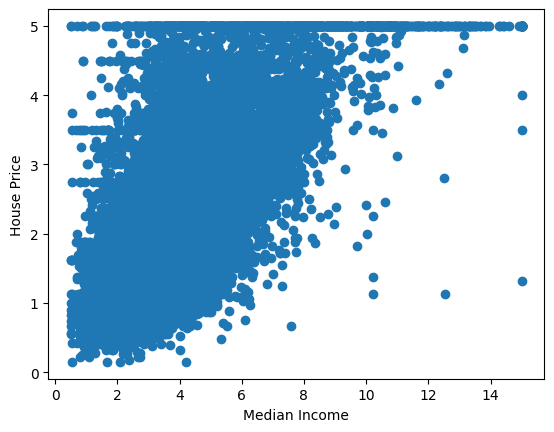

In [6]:
plt.scatter(X['MedInc'], y)
plt.xlabel('Median Income')
plt.ylabel('House Price')

По диаграмме видно, что чем больше `Median Income`, тем больше `House Price`, то есть видна прямая зависимость целевой переменной от признака `MedInc`.

## Задание 2

Постройте диаграмму рассеяния, отображающую зависимость целевой переменной от признака `Latitude`.
Какая это зависимость? - **зависимости особо нет между переменными. Есть зависимость кол-ва объявлений от широты - на каких-то парарллелях она выше**

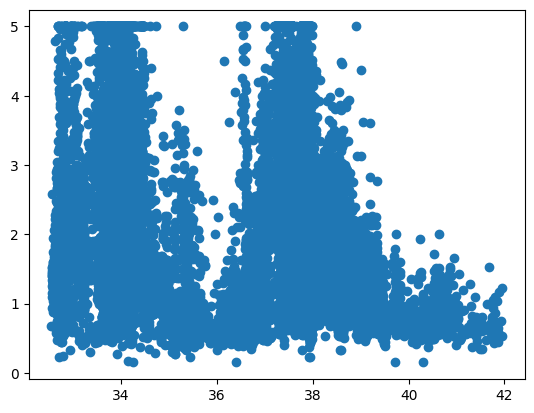

In [7]:
plt.scatter(X['Latitude'], y)

Ещё немного поисследуем данные. Полноценный разведочный анализ в рамках этого задания, конечно, не провести, но какие-то инструменты мы потрогаем.

Давайте построим тепловую карту корреляций.

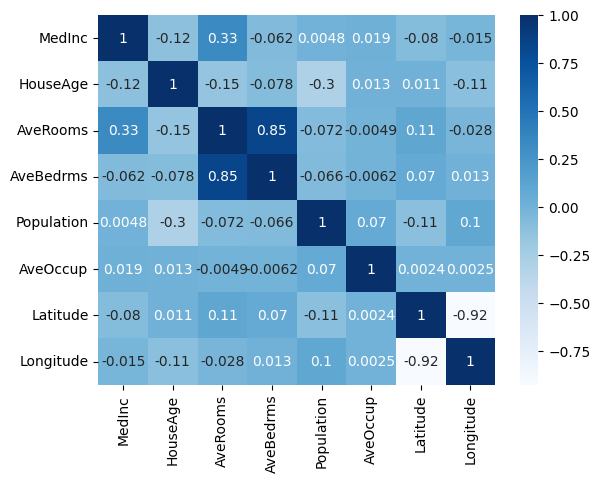

In [8]:
corr = X.corr()
sns.heatmap(corr, cmap="Blues", annot=True);

По этой матрице корреляций видно, что два наиболее зависимых признака - это `AveRooms` и `AveBedrms`.

Но интереснее посмотреть, какой признак имеет наибольшую корреляцию с целевой переменной!

## Задание 3

Добавьте к матрице `X` столбец `y` и постройте матрицу корреляций.
Какой признак имеет наибольшую по модулю корреляцию с таргетом?
После выполнения задания удалите добавленный столбец `y` из матрицы `X`.

In [23]:
X['target'] = y
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [24]:
X.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


**Наибольшую корреляцию с таргетом имеет признак MedInc - медианный доход**

Из комментов: можно получить корреляцию, не добавляя таргет в фичи:

In [25]:
X.corrwith(y)

MedInc        0.688075
HouseAge      0.105623
AveRooms      0.151948
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
target        1.000000
dtype: float64

In [27]:
del X['target']

Разбейте данные на тренировочную и тестовую часть (в тест отправьте 25% данных).

In [28]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.25, 
                                                random_state=RANDOM_STATE)

## Задание 4

Сколько объектов попали в тест?

Обучите линейную регрессию с параметрами по умолчанию на тренировочных данных и сделайте предсказание на тестовых данных.

In [30]:
Xtest.shape

(5160, 8)

In [31]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression() # инициализируем
model.fit(Xtrain, ytrain) # обучаем

LinearRegression()

In [36]:
predictions = model.predict(Xtest)

## Задание 5

Вычислите значение метрики *MSE* на тестовых данных.
Ответ округлите до десятых.

In [39]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predictions, ytest)

In [40]:
mse

0.5411287478470692

---

Атрибуты модели для общего развития и методы

In [42]:
model.rank_ # ранг матрицы фичей

8

In [44]:
model.n_features_in_ # число фичей

8

In [45]:
model.feature_names_in_ # фичи

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype=object)

In [46]:
model.intercept_ # свободный коэффициент, beta_0

-37.02782758526945

Косвенно об интепретируемости модели можно судить о том, какой предикт она выдаст при всех фичах = 0. В данном случае цена дома будет отрицательноый, что не очень хорошо

In [49]:
model.score(Xtest, ytest) # коэффициент детерминации R_squared

0.5910509795491349

In [50]:
from sklearn.metrics import r2_score

In [52]:
r2_score(predictions, ytest) # коэффициент детерминации R_squared 

0.3441351848714451